In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math 
from pylab import *
#pip install networkx==2.4

# Directed Graph

In [2]:
g1 = nx.DiGraph()
g1.add_edges_from([('1', '2'),('1','5'),('2','6'),('6','2'),('8','5'),('8','6')], weight=1)
g1.add_edges_from([('7','6'),('6','9'),('7','9'),('9','7'),('10','7'),('7','4'),('3','6')], weight=2)
g1.add_node('11')
g1.add_node('12')

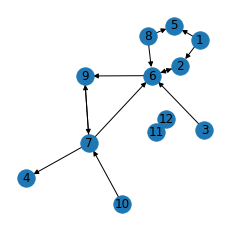

In [3]:
plt.figure(1,figsize=(3,3)) 
pos=nx.kamada_kawai_layout(g1)
nx.draw(g1,pos,with_labels=True)
plt.show()

In [4]:
nx.number_of_nodes(g1)

12

In [5]:
nx.number_of_edges(g1)

13

In [6]:
#Strongly connected components: There is a directed path between node A to node B and another from node B to node A.
sorted(nx.kosaraju_strongly_connected_components(g1))

[{'12'},
 {'11'},
 {'4'},
 {'5'},
 {'2', '6', '7', '9'},
 {'3'},
 {'10'},
 {'8'},
 {'1'}]

In [7]:
[len(c) for c in sorted(nx.kosaraju_strongly_connected_components(g1),key=len, reverse=True)]

[4, 1, 1, 1, 1, 1, 1, 1, 1]

In [8]:
#Weak connectivity
sorted(nx.weakly_connected_components(g1))

[{'1', '10', '2', '3', '4', '5', '6', '7', '8', '9'}, {'11'}, {'12'}]

In [9]:
[len(c) for c in sorted(nx.weakly_connected_components(g1),key=len, reverse=True)]

[10, 1, 1]

In [48]:
node_list=nx.nodes(g1)
degree=[g1.degree(n) for n in node_list] 
weighted_degree=[g1.degree(n, weight='weight') for n in node_list] 
df=pd.DataFrame({'nodes': node_list, 'degree': degree, 'weighted degree': weighted_degree})
df

,nodes,degree,weighted degree
0,1,2,2
1,2,3,3
2,5,2,2
3,6,6,9
4,8,2,2
5,7,5,10
6,9,3,6
7,10,1,2
8,4,1,2
9,3,1,2


<AxesSubplot:xlabel='degree', ylabel='Count'>

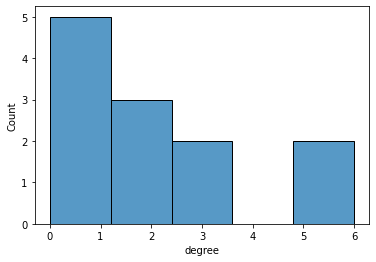

In [11]:
sns.histplot(df['degree'])

<AxesSubplot:xlabel='weighted degree', ylabel='Count'>

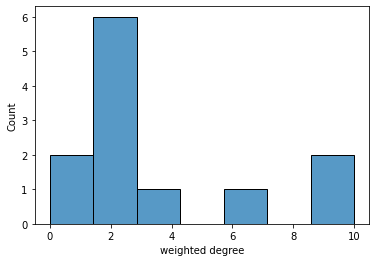

In [12]:
sns.histplot(df['weighted degree'])

In [13]:
#The average degree connectivity is the average nearest neighbor degree of nodes with degree 
nx.average_degree_connectivity(g1,source='in+out', target='in+out')

{2: 2.1666666666666665,
 3: 1.8333333333333333,
 6: 1.0,
 5: 2.0,
 1: 3.6666666666666665,
 0: 0}

In [14]:
#Compute the clustering coefficient for nodes.
nx.clustering(g1)

{'1': 0,
 '2': 0,
 '5': 0,
 '6': 0.07142857142857142,
 '8': 0,
 '7': 0.1111111111111111,
 '9': 0.5,
 '10': 0,
 '4': 0,
 '3': 0,
 '11': 0,
 '12': 0}

In [15]:
#Compute the average clustering coefficient for the graph 
nx.average_clustering(g1)

0.05687830687830688

<AxesSubplot:xlabel='degree', ylabel='average clustering coefficient'>

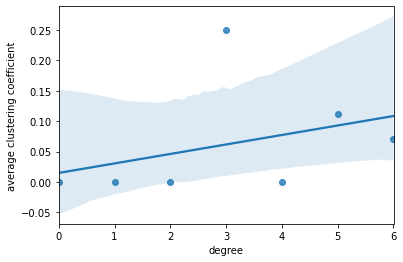

In [16]:
#Plot correlation between degree and centrality: for each degree from 0 to N, compute the average clustering coefficient of nodes and plot it as a line graph.
clustering=[nx.clustering(g1,str(n)) for n in nx.nodes(g1)] 
df['clustering']=clustering
degree_times=df['degree'].value_counts().to_dict()
sum_clustering=[0]*len(range(0,df['degree'].max()+1))
for i in range(0,df.shape[0]):
    sum_clustering[df.iloc[i,1]]=sum_clustering[df.iloc[i,1]]+df.iloc[i,3]
results=[]
for i in range(0,df['degree'].max()+1):
    if i in degree_times.keys():
        result=sum_clustering[i]/degree_times[i]
        results.append(result)
    else:
        results.append(0)
df2=pd.DataFrame()
df2['degree']=list(range(0,df['degree'].max()+1))
df2['average clustering coefficient']=results
sns.regplot(data=df2,x='degree',y='average clustering coefficient')

In [17]:
nx.closeness_centrality(g1)

{'1': 0.0,
 '2': 0.3181818181818182,
 '5': 0.18181818181818182,
 '6': 0.44545454545454544,
 '8': 0.0,
 '7': 0.2620320855614973,
 '9': 0.34265734265734266,
 '10': 0.0,
 '4': 0.23272727272727273,
 '3': 0.0,
 '11': 0.0,
 '12': 0.0}

In [18]:
nx.betweenness_centrality(g1)

{'1': 0.0,
 '2': 0.03636363636363636,
 '5': 0.0,
 '6': 0.15454545454545454,
 '8': 0.0,
 '7': 0.10909090909090909,
 '9': 0.09090909090909091,
 '10': 0.0,
 '4': 0.0,
 '3': 0.0,
 '11': 0.0,
 '12': 0.0}

In [19]:
nx.eigenvector_centrality(g1)

{'1': 8.530663463863822e-11,
 '2': 0.3392042397679767,
 '5': 4.180025097293271e-09,
 '6': 0.5054835699642528,
 '8': 8.530663463863822e-11,
 '7': 0.41407339541567045,
 '9': 0.6170617873989056,
 '10': 8.530663463863822e-11,
 '4': 0.2778575497635949,
 '3': 8.530663463863822e-11,
 '11': 8.530663463863822e-11,
 '12': 8.530663463863822e-11}

# Undirected Graph

In [20]:
g2 = nx.Graph()
g2.add_edges_from([('1', '2'),('1','5'),('2','6'),('6','2'),('8','5'),('8','6')], weight=1)
g2.add_edges_from([('7','6'),('6','9'),('7','9'),('9','7'),('10','7'),('7','4'),('3','6')], weight=2)
g2.add_node('11')
g2.add_node('12')

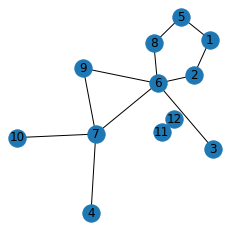

In [21]:
plt.figure(1,figsize=(3,3)) 
pos=nx.kamada_kawai_layout(g2)
nx.draw(g2,pos,with_labels=True)
plt.show()

In [22]:
nx.number_of_nodes(g2)

12

In [23]:
nx.number_of_edges(g2)

11

In [24]:
nx.number_connected_components(g2)

3

In [25]:
components_list=sorted(nx.connected_components(g2), key=len, reverse=True)
components_list

[{'1', '10', '2', '3', '4', '5', '6', '7', '8', '9'}, {'11'}, {'12'}]

In [26]:
[len(c) for c in sorted(nx.connected_components(g2), key=len, reverse=True)]

[10, 1, 1]

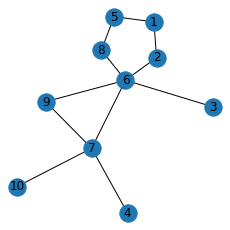

In [27]:
g2_1=g2.subgraph(components_list[0])
plt.figure(1,figsize=(3,3)) 
pos=nx.kamada_kawai_layout(g2_1)
nx.draw(g2_1,pos,with_labels=True)
plt.show()

In [49]:
node_list=nx.nodes(g2)
degree=[g2.degree(n) for n in node_list] 
weighted_degree=[g2.degree(n, weight='weight') for n in node_list] 
df=pd.DataFrame({'nodes': node_list, 'degree': degree,'weighted degree': weighted_degree})
df

,nodes,degree,weighted degree
0,1,2,2
1,2,2,2
2,5,2,2
3,6,5,8
4,8,2,2
5,7,4,8
6,9,2,4
7,10,1,2
8,4,1,2
9,3,1,2


<AxesSubplot:xlabel='degree', ylabel='Count'>

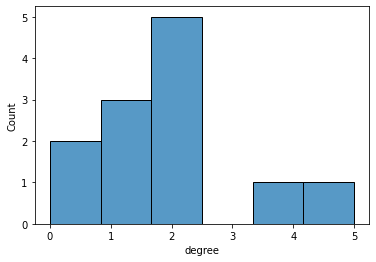

In [29]:
sns.histplot(df['degree'])

<AxesSubplot:xlabel='weighted degree', ylabel='Count'>

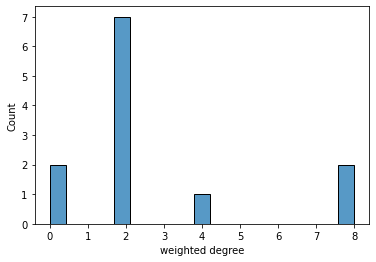

In [30]:
sns.histplot(df['weighted degree'])

In [31]:
df.sort_values('degree',ascending=False)[0:10]

,nodes,degree,weighted degree
3,6,5,8
5,7,4,8
0,1,2,2
1,2,2,2
2,5,2,2
4,8,2,2
6,9,2,4
7,10,1,2
8,4,1,2
9,3,1,2


In [32]:
nx.average_degree_connectivity(g2)

{2: 3.1, 5: 2.2, 4: 2.25, 1: 4.333333333333333, 0: 0}

In [33]:
#Compute the clustering coefficient for nodes.
nx.clustering(g2)

{'1': 0,
 '2': 0,
 '5': 0,
 '6': 0.1,
 '8': 0,
 '7': 0.16666666666666666,
 '9': 1.0,
 '10': 0,
 '4': 0,
 '3': 0,
 '11': 0,
 '12': 0}

In [34]:
#Compute the average clustering coefficient for the graph 
nx.average_clustering(g2)

0.10555555555555556

<AxesSubplot:xlabel='degree', ylabel='average clustering coefficient'>

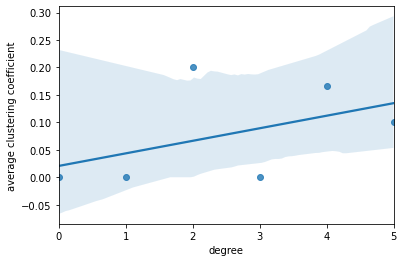

In [35]:
#Plot correlation between degree and centrality: for each degree from 0 to N, compute the average clustering coefficient of nodes and plot it as a line graph.
clustering=[nx.clustering(g2,str(n)) for n in nx.nodes(g2)] 
df['clustering']=clustering
degree_times=df['degree'].value_counts().to_dict()
sum_clustering=[0]*len(range(0,df['degree'].max()+1))
for i in range(0,df.shape[0]):
    sum_clustering[df.iloc[i,1]]=sum_clustering[df.iloc[i,1]]+df.iloc[i,3]
results=[]
for i in range(0,df['degree'].max()+1):
    if i in degree_times.keys():
        result=sum_clustering[i]/degree_times[i]
        results.append(result)
    else:
        results.append(0)
df2=pd.DataFrame()
df2['degree']=list(range(0,df['degree'].max()+1))
df2['average clustering coefficient']=results
sns.regplot(data=df2,x='degree',y='average clustering coefficient')

In [36]:
nx.closeness_centrality(g2)

{'1': 0.32015810276679846,
 '2': 0.4090909090909091,
 '5': 0.32015810276679846,
 '6': 0.5664335664335665,
 '8': 0.4090909090909091,
 '7': 0.46022727272727276,
 '9': 0.4090909090909091,
 '10': 0.3068181818181818,
 '4': 0.3068181818181818,
 '3': 0.35064935064935066,
 '11': 0.0,
 '12': 0.0}

In [37]:
nx.betweenness_centrality(g2)

{'1': 0.01818181818181818,
 '2': 0.10909090909090909,
 '5': 0.01818181818181818,
 '6': 0.45454545454545453,
 '8': 0.10909090909090909,
 '7': 0.2727272727272727,
 '9': 0.0,
 '10': 0.0,
 '4': 0.0,
 '3': 0.0,
 '11': 0.0,
 '12': 0.0}

In [38]:
nx.eigenvector_centrality(g2)

{'1': 0.15133037807284472,
 '2': 0.2656421960548923,
 '5': 0.15133037807284472,
 '6': 0.5806200820175323,
 '8': 0.2656421960548923,
 '7': 0.47480608842495564,
 '9': 0.3830367323153122,
 '10': 0.17231677067226434,
 '4': 0.17231677067226434,
 '3': 0.2107199616430479,
 '11': 7.646942293048884e-18,
 '12': 7.646942293048884e-18}

# Average distance in the graph, diameter

In [39]:
g3 = nx.Graph()
g3.add_edges_from([('1', '2'),('1','5'),('2','6'),('6','2'),('8','5'),('8','6')], weight=1)
g3.add_edges_from([('7','6'),('6','9'),('7','9'),('9','7'),('10','7'),('7','4'),('3','6')], weight=2)

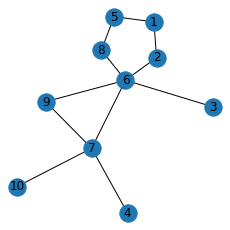

In [40]:
plt.figure(1,figsize=(3,3)) 
pos=nx.kamada_kawai_layout(g3)
nx.draw(g3,pos,with_labels=True)
plt.show()

In [41]:
nx.diameter(g3)

4

In [42]:
nx.average_shortest_path_length(g3)

2.2

# Degree distribution on a log-log scale

In [43]:
import json
import requests

In [44]:
url='http://snap.stanford.edu/data/wiki-Vote.txt.gz'
r=requests.get(url, allow_redirects=True)
data_file=open('wiki-Vote.txt.gz', 'wb').write(r.content)

In [45]:
g=nx.read_edgelist('wiki-Vote.txt.gz', comments='#', create_using=nx.DiGraph(), nodetype = int)

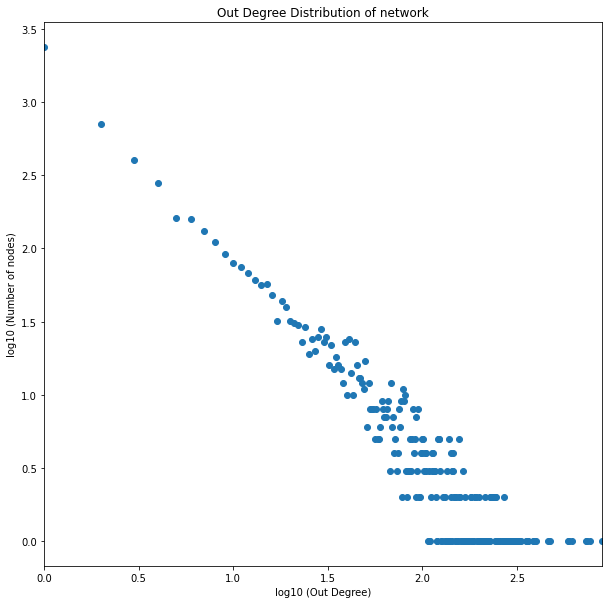

In [46]:
degrees=dict(g.out_degree())
degree_vals=list(filter(lambda val: val > 0, degrees.values()))
sorted_degree_vals=sorted(set(degree_vals))
hist=[degree_vals.count(x) for x in sorted_degree_vals]

x = np.asarray(sorted_degree_vals, dtype = float)
y = np.asarray(hist, dtype = float)

logx = np.log10(x)
logy = np.log10(y)

plt.figure(figsize=(10,10))
plt.xlim(min(logx), max(logx))
plt.xlabel('log10 (Out Degree)')
plt.ylabel('log10 (Number of nodes)')
plt.title('Out Degree Distribution of network')
out_degree_dist = plt.plot(logx, logy, 'o')

a: -1.2810647056745657
b: 3.1324547044999123


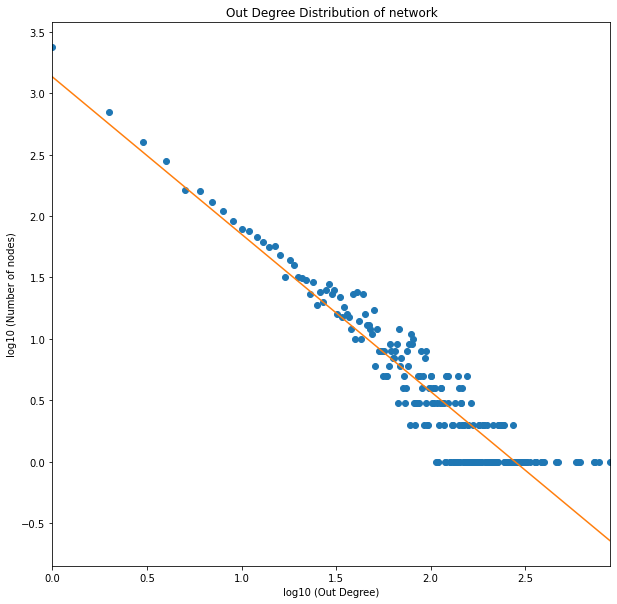

In [47]:
#Compute and plot the least-square regression line for the out-degree distribution in the log-log scale plot.
#We want to find coefficients a and b such that the function log10 y = a · log10 x + b best fits the outdegree distribution. 
from scipy.stats import linregress

a, b = np.polyfit(logx, logy, 1)

plt.figure(figsize=(10,10))
plt.xlim(min(logx), max(logx))
plt.xlabel('log10 (Out Degree)')
plt.ylabel('log10 (Number of nodes)')
plt.title('Out Degree Distribution of network')
scatter_plot = plt.plot(logx, logy, 'o')
scatter_plot_regression = plt.plot(logx, a*logx + b)

print("a: " + str(a))
print("b: " + str(b))